# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

**Solution**
- n_estimators: number of trees in the forest. A low number of trees means that the fitting of the random forest and therefore the result depends a lot of the obervations sampled for each tree (if bootstrapped) and on the features which are used to split the data (if not all features used). Hence, a low value can lead to overfitting. In contrast, a too high value would bring no significant performance gain, but only increase the computational cost. 


- max_depth: Controls the maximum depth of the tree. The deeper a tree, the more splits it has and it captures more information about the data. A large value can lead to overfitting. In the extrem the trees can perfectly predict all of the train data, but is not generalizable to new data. A too low value means that the tree capture little information and therefore performs badly.   


- max_feature: number of features to consider when looking for the best node split. A high value increases the computational cost. If max_feature equals the number of feature, then at every node each feature of the dataset is considered as the best split. A low value can hurt the model performance, since the features considered at each node are random chosen and hence must not be optimal. It can lead to overfitting, when by chance the trees randomly select similar features at each node. 


- bootstrap: Whether bootstrap samples are used when building trees. If true, the bootstrap sample is taken from the input data by using sampling with replacement. If False, the whole dataset is used to build each tree. 



> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

**Solution**

- bootstap=False --> all trees use the whole dataset (train data) to fit the tree

- max_features= # of features --> for each node in the tree all (hence the same) features are considered. Therefore, for each tree the node should be split similarly

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

In [2]:
class cmap_in_categories:
    """Create map to range of colors inside given categories.
    Example
    -------
    >>> cmap = cmap_in_categories(['cats', 'dogs', 'squirrels'])
    >>> cmap('squirrels')
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_categories, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain_map = dict(list(zip(cmap_categories, list(range(len(cmap_categories))))))
        self.cmap_domain = [min(self.cmap_domain_map.values()), max(self.cmap_domain_map.values())]
        self.cmap_categories = cmap_categories
        self.cmap_range = cmap_range
        self.m = interp1d(self.cmap_domain, self.cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, category):
        if not category in self.cmap_categories:
            raise Exception("Category must be inside cmap_categories.")
        return self.cmap(self.m(self.cmap_domain_map[category]))

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap.umap_ as umap
from scipy.interpolate import interp1d
import matplotlib.pylab as plt

In [4]:
def comparison_plot(data='digits', scale=False):
    
    if (data == 'wine'):
        # Get wine data
        data_wine = load_wine()
        X = data_wine['data']
        y = data_wine['target']
    
    
    if (data == 'digits'):
        # Get digits data
        data_digits = load_digits()
        X = data_digits['data']
        y = data_digits['target']
    
    
    cmap = cmap_in_categories(sorted(set(y)))
    

    plt.figure(figsize=(12,12))
    
    
    #PCA
    plt.subplot(2,2,1)
    
    if (scale==True):
        pca = make_pipeline(StandardScaler(),
                        PCA(n_components=2))
    else:    
        pca = PCA(n_components=2)
    
    X_pca = pca.fit_transform(X)
    plt.title("PCA", fontsize=20)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[cmap(y_) for y_ in y])
    plt.xlabel("1st component", fontsize=10)
    plt.ylabel("2nd component", fontsize=10)
    
    
    #LDA
    plt.subplot(222)
    
    if (scale==True):
        lda = make_pipeline(StandardScaler(),
                            LDA(n_components=2))
    else:
        lda = LDA(n_components=2)
        
    X_lda = lda.fit_transform(X, y)
    plt.title("LDA", fontsize=20)
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=[cmap(y_) for y_ in y])
    plt.xlabel("1st component", fontsize=10)
    plt.ylabel("2nd component", fontsize=10)
    
    
    #t-SNE
    plt.subplot(223)
    
    if (scale==True):
        tsne = make_pipeline(StandardScaler(),
                            TSNE(n_components=2))
    else:    
        tsne = TSNE(n_components=2)
        
    X_tsne = tsne.fit_transform(X)
    plt.title("t-SNE", fontsize=20)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=[cmap(y_) for y_ in y])
    plt.xlabel("1st component", fontsize=10)
    plt.ylabel("2nd component", fontsize=10)
    
    
    # UMAP
    plt.subplot(224)
    
    if (scale==True):
        um = make_pipeline(StandardScaler(),
                            umap.UMAP(n_components=2))
    else:    
        um = umap.UMAP(n_components=2)
        
    X_u = um.fit_transform(X)
    plt.title("UMAP", fontsize=20)
    plt.scatter(X_u[:, 0], X_u[:, 1], c=[cmap(y_) for y_ in y], label=[cmap(y_) for y_ in y])
    plt.xlabel("1st component", fontsize=10)
    plt.ylabel("2nd component", fontsize=10)

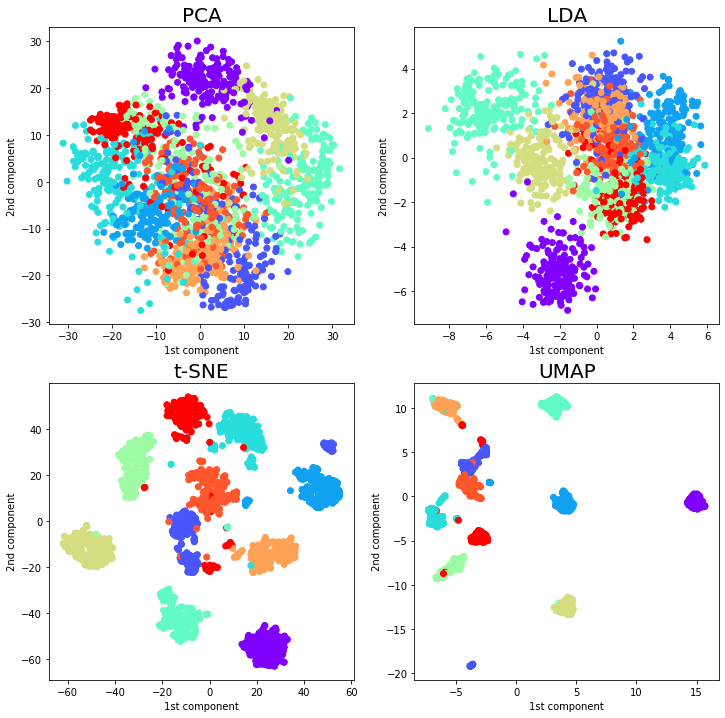

In [5]:
comparison_plot(data='digits')

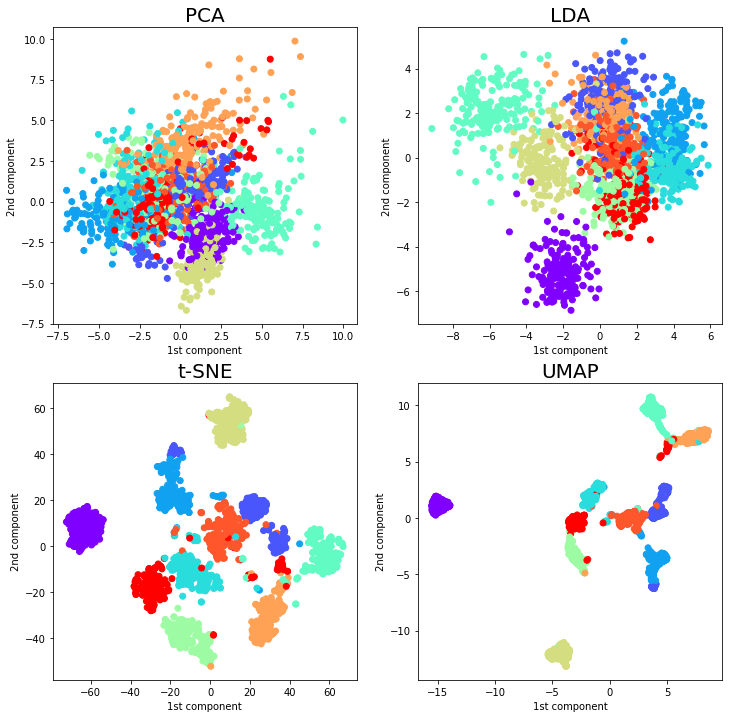

In [6]:
comparison_plot(data='digits', scale=True)

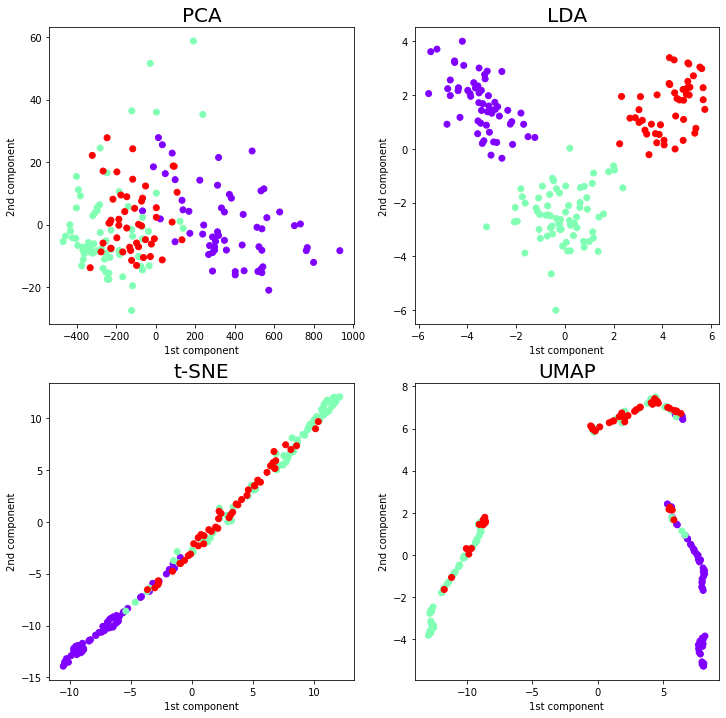

In [7]:
comparison_plot(data='wine')

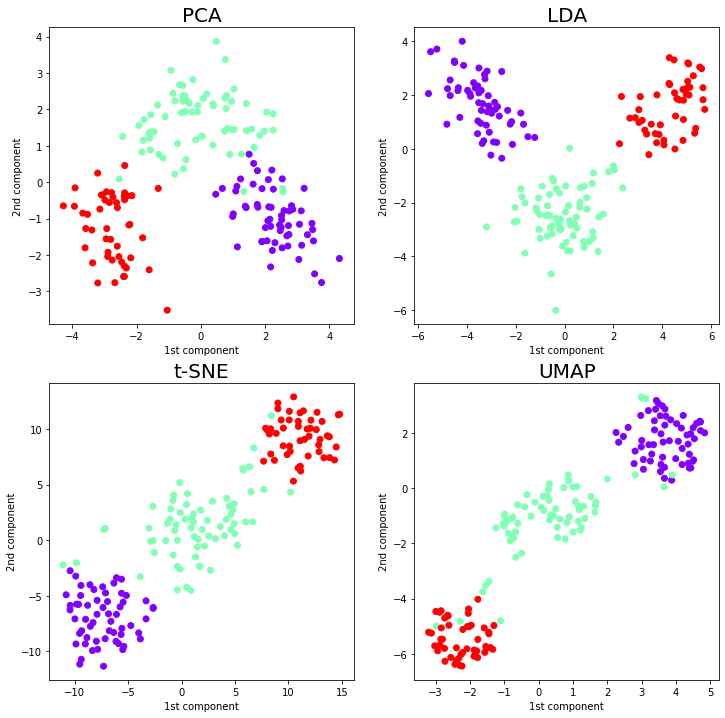

In [8]:
comparison_plot(data='wine', scale=True)

(1797, 64)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1fc56710>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1fc56da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1fc56320>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20684470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a206847b8>],
 'means': []}

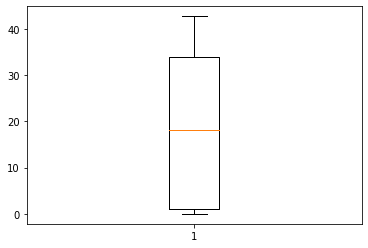

In [9]:
import numpy as np
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']
print(X_digits.shape)
var_digits = np.var(X_digits, axis=0)

plt.boxplot(var_digits)

(178, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a2071f438>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2071fac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2071f048>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2071fef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a207294e0>],
 'means': []}

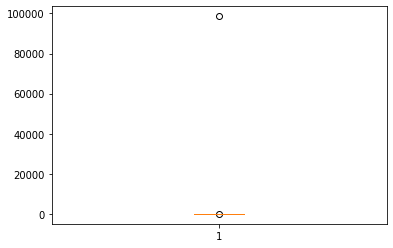

In [10]:
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']
print(X_wine.shape)
var_wine = np.var(X_wine, axis=0)

plt.boxplot(var_wine)

**Solutions**
- What problems do you observe if you don't standardize the wine dataset? 
    
In the wine dataset the variance of the features differ a lot. Using dimension reduction methods on these features will yield probelmatic outcomes, since the methods will overfit on the features with the most variance. Looking at the boxplot one can see there seemes to be a feature with a particular high variance, compared to the other features. Therefore, it is important to standardize the data, so that all features are comparable. 

- Why is this not a problem with the digits data?

The variance of the features in the digits dataset do not differ that much. Therefore, standardisation does not change much. 

- Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data

The digits data set can not linearly projected on a two-dimensional space. Therefore, the PCA and LDA methods fail to reduce the dimension of the dataset. But the nonlinear methods, t-SNE and UMAP are quite good for the digits dataset, especially UMAP. One reason is certainly that the digits dataset contains a lot of feature, thus is of high-dimension. 

For the wine dataset, the LDA method does perform quite good. There are two reason: first, the LDA method is a supervised technique, hence takes also the target variable as input. Therefore, it has 'more' information than the PCA method, which only takes X as input. 
Second, the wine dataset has fewer features than the digits dataset, which means that methods like UMAP and t-SNE are less applicable, because they are usually used in for very high-dimensional data.

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

**Solution** 

From the Athey, Imbens (2015) paper:

Athey and Imbens say that a model is “honest” if it does not use the same information for selecting the model structure as for estimation given a model structure.

- Intuition: They argue that honesty has the implication that the asymptotic properties of the treatment effect estimates within the partitions are the same as if the partition had been exogenously given. There should be no spurious correlations between covariates and outcomes which affected the selected model, since it based on different information. 

- Implementation: The honesty is implemented by splitting the training sample into two parts, one for constructing the tree and a second for estimating treatment effects within leaves of the tree.

- Caveat: There is a loss of precision due to sample splitting (which reduces sample size in each step of estimation), which should be offset by the benefit in terms of eliminating bias.